In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

def inspecionar_mat(file_path):
    if not os.path.exists(file_path):
        print(f"❌ Erro: O ficheiro '{file_path}' não foi encontrado.")
        return

    try:
        # Carregar o .mat
        data = scipy.io.loadmat(file_path)
        print(f"📂 == Conteúdo de: {os.path.basename(file_path)} ==\n")
        
        for key, value in data.items():
            # Ignorar metadados internos (__header__, etc.)
            if key.startswith('__'):
                continue
            
            print(f"🔹 Chave: '{key}'")
            print(f"   Tipo: {type(value)}")
            
            if isinstance(value, np.ndarray):
                print(f"   Shape: {value.shape}")
                print(f"   Dtype: {value.dtype}")
                
                # Se for uma matriz pequena (ex: R, T, K), mostra os valores
                if value.size <= 20:
                    print(f"   Valores:\n{value}\n")
                
                # VISUALIZAÇÃO INTELIGENTE
                # Se for 2D e tiver tamanho razoável, assume que é imagem/depth e mostra
                elif value.ndim == 2 and value.size > 20:
                    print(f"   (Visualizando matriz 2D como imagem...)")
                    plt.figure(figsize=(6, 4))
                    plt.imshow(value, cmap='plasma') # 'plasma' é ótimo para profundidade
                    plt.colorbar(label='Valor (ex: mm)')
                    plt.title(f"Conteúdo de: {key}")
                    plt.axis('off')
                    plt.show()
                    print("-" * 30)
                else:
                    print("   (Matriz grande, conteúdo oculto)")
                    print("-" * 30)
            else:
                print(f"   Valor: {value}")
                print("-" * 30)

    except Exception as e:
        print(f"Erro ao ler o ficheiro: {e}")

📂 == Conteúdo de: templatedepth.mat ==

🔹 Chave: 'depth'
   Tipo: <class 'numpy.ndarray'>
   Shape: (518, 518)
   Dtype: float32
   (Visualizando matriz 2D como imagem...)


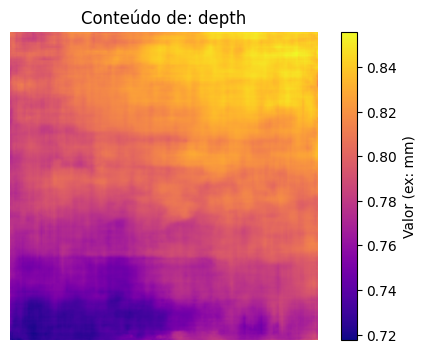

------------------------------
🔹 Chave: 'K'
   Tipo: <class 'numpy.ndarray'>
   Shape: (3, 3)
   Dtype: float32
   Valores:
[[668.88275   0.      260.81577]
 [  0.      669.5318  260.12296]
 [  0.        0.        1.     ]]



In [3]:
# Exemplo de uso
# Podes colocar o caminho relativo ou absoluto
caminho_arquivo = 'template/templatedepth.mat'  # <--- ALTERA O NOME AQUI

inspecionar_mat(caminho_arquivo)

📂 == Conteúdo de: frame_0003.mat ==

🔹 Chave: 'depth'
   Tipo: <class 'numpy.ndarray'>
   Shape: (518, 518)
   Dtype: float32
   (Visualizando matriz 2D como imagem...)


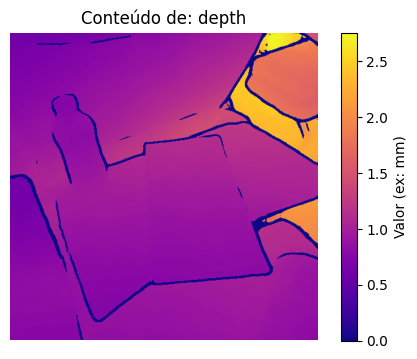

------------------------------
🔹 Chave: 'K'
   Tipo: <class 'numpy.ndarray'>
   Shape: (3, 3)
   Dtype: float32
   Valores:
[[566.6302    0.      261.7797 ]
 [  0.      565.13257 261.70743]
 [  0.        0.        1.     ]]



In [4]:
# Exemplo de uso
# Podes colocar o caminho relativo ou absoluto
caminho_arquivo = 'imgs/frame_0003.mat'  # <--- ALTERA O NOME AQUI

inspecionar_mat(caminho_arquivo)